# Notebook Set-up

In [1]:
!pip install pandas
!pip install matplotlib
!pip install kneed
!pip install nbimporter
!pip install html5lib
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.patches import Ellipse
import streamlit as st
import pandas as pd
import plotly.express as px
from scipy.stats import zscore

pd.set_option('display.max_columns', None)

# Premier League data

In [100]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/stats/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_squads_standard_against')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

standard_stats_against = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(standard_stats_against.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    standard_stats_against.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in standard_stats_against.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    standard_stats_against.columns = [col.strip() for col in standard_stats_against.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
standard_stats_against = standard_stats_against.loc[:, ~standard_stats_against.columns.duplicated()]

# Remove rows where the values match the header row
header_row = standard_stats_against.columns.tolist()  # Get the header as a list
standard_stats_against = standard_stats_against[~standard_stats_against.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
standard_stats_against = standard_stats_against.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
standard_stats_against.columns = [col.lower().replace(' ', '_') for col in standard_stats_against.columns]

standard_stats_against['squad'] = standard_stats_against['squad'].apply(
    lambda x: x.replace("vs ", "") if isinstance(x, str) and x.lower().startswith("vs ") else x
)


#standard_stats_against = standard_stats_against.merge(player_min, on='player_id', how='left')

# Check the cleaned data
standard_stats_against = standard_stats_against[['squad','performance_gls','expected_xg']]
standard_stats_against = standard_stats_against.rename(columns={
    'performance_gls': 'goals_conceded',
    'expected_xg': 'expected_xg_conceded'
})



C:\Users\ibrah\AppData\Local\Temp\ipykernel_21452\3903335719.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


In [101]:
standard_stats_against

,squad,goals_conceded,expected_xg_conceded
0,Arsenal,34,34.4
1,Aston Villa,51,50.1
2,Bournemouth,46,48.5
3,Brentford,54,55.4
4,Brighton,57,54.6
5,Chelsea,43,47.3
6,Crystal Palace,48,49.1
7,Everton,44,46.2
8,Fulham,52,47.2
9,Ipswich Town,80,72.7


## Standard Stats

In [3]:
import pandas as pd
import re

standard_stats_pl = pd.read_html(
    'https://fbref.com/en/comps/9/stats/Premier-League-Stats',
    attrs={'id': 'stats_squads_standard_for'}
)[0]

standard_stats_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in standard_stats_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

standard_stats_pl.columns = [clean_column(col) for col in standard_stats_pl.columns]

standard_stats_pl['squad'] = standard_stats_pl['squad'].str.strip()

standard_stats_pl.head()


,squad,#_pl,age,poss,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_g+a,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,expected_xg,expected_npxg,expected_xag,expected_npxg+xag,progression_prgc,progression_prgp,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_g+a,per_90_minutes_g-pk,per_90_minutes_g+a-pk,per_90_minutes_xg,per_90_minutes_xag,per_90_minutes_xg+xag,per_90_minutes_npxg,per_90_minutes_npxg+xag
0,Arsenal,25,25.8,56.9,38,418,3420,38.0,67,55,122,65,2,2,70,6,59.9,58.4,45.3,103.6,852,1826,1.76,1.45,3.21,1.71,3.16,1.58,1.19,2.77,1.54,2.73
1,Aston Villa,28,27.0,50.5,38,418,3420,38.0,56,45,101,53,3,6,76,4,56.1,51.3,41.7,93.0,720,1344,1.47,1.18,2.66,1.39,2.58,1.48,1.10,2.57,1.35,2.45
2,Bournemouth,29,25.1,48.5,38,418,3420,38.0,57,41,98,51,6,7,97,3,64.0,58.5,43.8,102.3,754,1489,1.50,1.08,2.58,1.34,2.42,1.68,1.15,2.84,1.54,2.69
3,Brentford,28,25.8,47.9,38,418,3420,38.0,65,44,109,60,5,6,62,1,59.0,54.4,42.4,96.8,598,1356,1.71,1.16,2.87,1.58,2.74,1.55,1.12,2.67,1.43,2.55
4,Brighton,32,24.8,52.3,38,418,3420,38.0,64,41,105,57,7,7,78,3,58.7,53.3,40.4,93.7,816,1539,1.68,1.08,2.76,1.50,2.58,1.54,1.06,2.61,1.40,2.47


## Squad Passing

In [4]:
squad_passing_pl = pd.read_html(
    'https://fbref.com/en/comps/9/passing/Premier-League-Stats',
    attrs={'id': 'stats_squads_passing_for'}
)[0]

squad_passing_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_passing_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_passing_pl.columns = [clean_column(col) for col in squad_passing_pl.columns]

squad_passing_pl['squad'] = squad_passing_pl['squad'].str.strip()

squad_passing_pl.head()


,squad,#_pl,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xag,expected_xa,expected_a-xag,kp,1/3,ppa,crspa,prgp
0,Arsenal,25,38.0,17066,20241,84.3,278808,87055,8591,9363,91.8,7129,7999,89.1,1031,2022,51.0,55,45.3,45.7,9.7,428,1397,437,75,1826
1,Aston Villa,28,38.0,14701,17797,82.6,252637,88182,6778,7510,90.3,6555,7386,88.7,1088,2065,52.7,45,41.7,36.9,3.3,358,1137,319,56,1344
2,Bournemouth,29,38.0,12977,16900,76.8,233955,86767,5648,6514,86.7,5659,6670,84.8,1365,2819,48.4,41,43.8,36.5,-2.8,437,1242,339,106,1489
3,Brentford,28,38.0,13358,17100,78.1,245539,93263,5849,6739,86.8,5826,6875,84.7,1449,2741,52.9,44,42.4,38.1,1.6,330,1104,325,91,1356
4,Brighton,32,38.0,15820,19188,82.4,268916,90984,7629,8443,90.4,6541,7472,87.5,1313,2397,54.8,41,40.4,39.1,0.6,377,1189,339,87,1539


## Squad Shooting

In [6]:
squad_shooting_pl = pd.read_html(
    'https://fbref.com/en/comps/9/shooting/Premier-League-Stats',
    attrs={'id': 'stats_squads_shooting_for'}
)[0]

squad_shooting_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_shooting_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_shooting_pl.columns = [clean_column(col) for col in squad_shooting_pl.columns]

squad_shooting_pl['squad'] = squad_shooting_pl['squad'].str.strip()

squad_shooting_pl.head()


,squad,#_pl,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg
0,Arsenal,25,38.0,67,544,178,32.7,14.32,4.68,0.12,0.37,15.1,10,2,2,59.9,58.4,0.11,7.1,6.6
1,Aston Villa,28,38.0,56,478,159,33.3,12.58,4.18,0.11,0.33,16.3,12,3,6,56.1,51.3,0.11,-0.1,1.7
2,Bournemouth,29,38.0,57,574,192,33.4,15.11,5.05,0.09,0.27,16.7,10,6,7,64.0,58.5,0.10,-7.0,-7.5
3,Brentford,28,38.0,65,434,173,39.9,11.42,4.55,0.14,0.35,14.9,10,5,6,59.0,54.4,0.13,6.0,5.6
4,Brighton,32,38.0,64,526,183,34.8,13.84,4.82,0.11,0.31,17.2,25,7,7,58.7,53.3,0.10,5.3,3.7


## Squad Pass Types

In [7]:
squad_pass_types_pl = pd.read_html(
    'https://fbref.com/en/comps/9/passing_types/Premier-League-Stats',
    attrs={'id': 'stats_squads_passing_types_for'}
)[0]

squad_pass_types_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_pass_types_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_pass_types_pl.columns = [clean_column(col) for col in squad_pass_types_pl.columns]

squad_pass_types_pl['squad'] = squad_pass_types_pl['squad'].str.strip()

squad_pass_types_pl.head()


,squad,#_pl,90s,att,pass_types_live,pass_types_dead,pass_types_fk,pass_types_tb,pass_types_sw,pass_types_crs,pass_types_ti,pass_types_ck,corner_kicks_in,corner_kicks_out,corner_kicks_str,outcomes_cmp,outcomes_off,outcomes_blocks
0,Arsenal,25,38.0,20241,18608,1553,432,80,74,766,598,251,211,3,2,17066,80,278
1,Aston Villa,28,38.0,17797,16044,1698,583,95,58,604,497,230,148,24,1,14701,55,346
2,Bournemouth,29,38.0,16900,15136,1694,430,59,78,832,686,228,166,18,4,12977,70,314
3,Brentford,28,38.0,17100,15453,1584,386,69,71,674,602,174,139,2,0,13358,63,288
4,Brighton,32,38.0,19188,17527,1615,482,77,76,704,605,188,107,48,7,15820,46,310


## Squad Goal and Shot Creation

In [8]:
squad_goal_shot_creation_pl = pd.read_html(
    'https://fbref.com/en/comps/9/gca/Premier-League-Stats',
    attrs={'id': 'stats_squads_gca_for'}
)[0]

squad_goal_shot_creation_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_goal_shot_creation_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_goal_shot_creation_pl.columns = [clean_column(col) for col in squad_goal_shot_creation_pl.columns]

squad_goal_shot_creation_pl['squad'] = squad_goal_shot_creation_pl['squad'].str.strip()


squad_goal_shot_creation_pl.head()


,squad,#_pl,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def
0,Arsenal,25,38.0,969,25.50,726,82,52,64,34,11,119,3.13,86,11,6,11,4,1
1,Aston Villa,28,38.0,849,22.34,602,85,51,58,39,14,102,2.68,80,7,3,6,4,2
2,Bournemouth,29,38.0,1012,26.63,767,68,44,70,42,21,93,2.45,62,6,5,8,10,2
3,Brentford,28,38.0,780,20.53,569,74,40,51,35,11,113,2.97,78,11,5,9,9,1
4,Brighton,32,38.0,933,24.55,685,70,56,53,55,14,113,2.97,78,7,10,6,10,2


## Squad Defensive Actions

In [9]:
squad_defensive_actions_pl = pd.read_html(
    'https://fbref.com/en/comps/9/defense/Premier-League-Stats',
    attrs={'id': 'stats_squads_defense_for'}
)[0]

squad_defensive_actions_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_defensive_actions_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_defensive_actions_pl.columns = [clean_column(col) for col in squad_defensive_actions_pl.columns]

squad_defensive_actions_pl['squad'] = squad_defensive_actions_pl['squad'].str.strip()


squad_defensive_actions_pl.head()


,squad,#_pl,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl%,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tkl+int,clr,err
0,Arsenal,25,38.0,598,348,220,249,129,260,515,50.5,255,328,106,222,225,823,680,33
1,Aston Villa,28,38.0,637,372,293,249,95,310,546,56.8,236,329,107,222,240,877,788,43
2,Bournemouth,29,38.0,691,399,290,299,102,301,627,48.0,326,459,136,323,351,1042,1013,22
3,Brentford,28,38.0,633,380,289,223,121,314,596,52.7,282,480,199,281,285,918,1040,28
4,Brighton,32,38.0,705,431,287,297,121,350,703,49.8,353,439,122,317,315,1020,762,29


## Squad Possesssion

In [10]:
squad_possession_pl = pd.read_html(
    'https://fbref.com/en/comps/9/possession/Premier-League-Stats',
    attrs={'id': 'stats_squads_possession_for'}
)[0]

squad_possession_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_possession_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_possession_pl.columns = [clean_column(col) for col in squad_possession_pl.columns]

squad_possession_pl['squad'] = squad_possession_pl['squad'].str.strip()


squad_possession_pl.head()


,squad,#_pl,poss,90s,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,take-ons_att,take-ons_succ,take-ons_succ%,take-ons_tkld,take-ons_tkld%,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr
0,Arsenal,25,56.9,38.0,24056,1844,6064,10362,7808,1282,24054,726,320,44.1,316,43.5,14234,75544,40246,852,540,286,483,382,16894,1801
1,Aston Villa,28,50.5,38.0,21699,2646,7301,9257,5362,951,21693,726,327,45.0,299,41.2,12334,68906,36242,720,448,212,508,386,14423,1331
2,Bournemouth,29,48.5,38.0,21618,2217,6444,9314,6128,1005,21611,672,294,43.8,300,44.6,11733,69030,36709,754,534,228,597,350,12855,1474
3,Brentford,28,47.9,38.0,21489,3282,8328,8055,5308,987,21483,627,265,42.3,293,46.7,11409,61941,31661,598,380,213,549,300,13151,1339
4,Brighton,32,52.3,38.0,23677,2601,7503,10292,6153,1085,23670,797,338,42.4,382,47.9,13919,76882,41746,816,576,263,583,344,15637,1522


## Squad Playing Time

In [11]:
squad_playing_time_pl = pd.read_html(
    'https://fbref.com/en/comps/9/playingtime/Premier-League-Stats',
    attrs={'id': 'stats_squads_playing_time_for'}
)[0]

squad_playing_time_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_playing_time_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_playing_time_pl.columns = [clean_column(col) for col in squad_playing_time_pl.columns]

squad_playing_time_pl['squad'] = squad_playing_time_pl['squad'].str.strip()


squad_playing_time_pl.head()


,squad,#_pl,age,playing_time_mp,playing_time_min,playing_time_mn/mp,playing_time_min%,playing_time_90s,starts_starts,starts_mn/start,starts_compl,subs_subs,subs_mn/sub,subs_unsub,team_success_ppm,team_success_ong,team_success_onga,team_success_+/-,team_success_+/-90,team_success_(xg)_onxg,team_success_(xg)_onxga,team_success_(xg)_xg+/-,team_success_(xg)_xg+/-90
0,Arsenal,25,25.8,38,3420,90,100,38.0,418,83,272,142,18,200,1.95,69,34,35,0.92,59.9,34.4,25.5,0.67
1,Aston Villa,28,27.0,38,3420,90,100,38.0,418,80,246,170,23,170,1.74,58,51,7,0.18,56.1,50.1,5.9,0.16
2,Bournemouth,29,25.1,38,3420,90,100,38.0,418,83,254,162,18,180,1.47,58,46,12,0.32,64.0,48.5,15.5,0.41
3,Brentford,28,25.8,38,3420,90,100,38.0,418,85,277,142,15,200,1.47,66,57,9,0.24,59.0,55.4,3.6,0.09
4,Brighton,32,24.8,38,3420,90,100,38.0,418,82,231,184,18,158,1.61,66,59,7,0.18,58.7,54.6,4.1,0.11


## Squad Misc Stats

In [12]:
squad_misc_stats_pl = pd.read_html(
    'https://fbref.com/en/comps/9/misc/Premier-League-Stats',
    attrs={'id': 'stats_squads_misc_for'}
)[0]

squad_misc_stats_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_misc_stats_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_misc_stats_pl.columns = [clean_column(col) for col in squad_misc_stats_pl.columns]

squad_misc_stats_pl['squad'] = squad_misc_stats_pl['squad'].str.strip()


squad_misc_stats_pl.head()


,squad,#_pl,90s,performance_crdy,performance_crdr,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerial_duels_won,aerial_duels_lost,aerial_duels_won%
0,Arsenal,25,38.0,70,6,3,401,405,80,766,225,348,2,3,0,1436,471,465,50.3
1,Aston Villa,28,38.0,76,4,2,406,499,55,604,240,372,6,3,0,1418,378,423,47.2
2,Bournemouth,29,38.0,97,3,0,525,400,70,832,351,399,7,4,0,1821,573,606,48.6
3,Brentford,28,38.0,62,1,0,320,339,63,674,285,380,6,1,3,1644,624,567,52.4
4,Brighton,32,38.0,78,3,2,438,411,46,704,315,431,6,9,2,1624,518,463,52.8


## Squad Goalkeeping

In [13]:
squad_goalkeeping_pl = pd.read_html(
    'https://fbref.com/en/comps/9/keepers/Premier-League-Stats',
    attrs={'id': 'stats_squads_keeper_for'}
)[0]

squad_goalkeeping_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_goalkeeping_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_goalkeeping_pl.columns = [clean_column(col) for col in squad_goalkeeping_pl.columns]

squad_goalkeeping_pl['squad'] = squad_goalkeeping_pl['squad'].str.strip()


squad_goalkeeping_pl.head()


,squad,#_pl,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_ga,performance_ga90,performance_sota,performance_saves,performance_save%,performance_w,performance_d,performance_l,performance_cs,performance_cs%,penalty_kicks_pkatt,penalty_kicks_pka,penalty_kicks_pksv,penalty_kicks_pkm,penalty_kicks_save%
0,Arsenal,1,38,38,3420,38.0,34,0.89,120,86,74.2,20,14,4,13,34.2,3,3,0,0,0.0
1,Aston Villa,2,38,38,3420,38.0,51,1.34,156,104,68.6,19,9,10,9,23.7,3,2,1,0,33.3
2,Bournemouth,3,38,38,3420,38.0,46,1.21,172,126,75.6,15,11,12,9,23.7,4,4,0,0,0.0
3,Brentford,2,38,38,3420,38.0,57,1.50,207,153,72.9,16,8,14,8,21.1,1,1,0,0,0.0
4,Brighton,2,38,38,3420,38.0,59,1.55,147,90,66.0,16,13,9,8,21.1,9,9,0,0,0.0


# Combining team data

In [14]:
def safe_merge(df1, df2, on, how='left'):
    # Identify overlapping columns other than the join key
    overlapping_cols = set(df1.columns) & set(df2.columns) - {on}
    
    # Drop overlapping columns from the second dataframe
    df2_cleaned = df2.drop(columns=overlapping_cols)
    
    return df1.merge(df2_cleaned, on=on, how=how)


In [102]:
team_data_all = standard_stats_pl
team_data_all = safe_merge(team_data_all, squad_passing_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_shooting_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_pass_types_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_goal_shot_creation_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_defensive_actions_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_possession_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_playing_time_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_misc_stats_pl, on='squad')
team_data_all = safe_merge(team_data_all, squad_goalkeeping_pl, on='squad')
team_data_all = safe_merge(team_data_all,standard_stats_against, on='squad')


team_data_all = team_data_all.loc[:, ~team_data_all.columns.str.contains("90")]

team_data_all = team_data_all.drop(columns=['playing_time_mp', 'playing_time_starts', 'playing_time_min'])

team_data_all



,squad,#_pl,age,poss,performance_gls,performance_ast,performance_g+a,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,expected_xg,expected_npxg,expected_xag,expected_npxg+xag,progression_prgc,progression_prgp,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xag,expected_xa,expected_a-xag,kp,1/3,ppa,crspa,prgp,standard_gls,standard_sh,standard_sot,standard_sot%,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_npxg/sh,expected_g-xg,expected_np:g-xg,att,pass_types_live,pass_types_dead,pass_types_fk,pass_types_tb,pass_types_sw,pass_types_crs,pass_types_ti,pass_types_ck,corner_kicks_in,corner_kicks_out,corner_kicks_str,outcomes_cmp,outcomes_off,outcomes_blocks,sca_sca,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl%,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tkl+int,clr,err,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,take-ons_att,take-ons_succ,take-ons_succ%,take-ons_tkld,take-ons_tkld%,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr,playing_time_mn/mp,playing_time_min%,starts_starts,starts_mn/start,starts_compl,subs_subs,subs_mn/sub,subs_unsub,team_success_ppm,team_success_ong,team_success_onga,team_success_+/-,team_success_(xg)_onxg,team_success_(xg)_onxga,team_success_(xg)_xg+/-,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerial_duels_won,aerial_duels_lost,aerial_duels_won%,performance_ga,performance_sota,performance_saves,performance_save%,performance_w,performance_d,performance_l,performance_cs,performance_cs%,penalty_kicks_pkatt,penalty_kicks_pka,penalty_kicks_pksv,penalty_kicks_pkm,penalty_kicks_save%,goals_conceded,expected_xg_conceded
0,Arsenal,25,25.8,56.9,67,55,122,65,2,2,70,6,59.9,58.4,45.3,103.6,852,1826,17066,20241,84.3,278808,87055,8591,9363,91.8,7129,7999,89.1,1031,2022,51.0,55,45.3,45.7,9.7,428,1397,437,75,1826,67,544,178,32.7,0.12,0.37,15.1,10,2,2,0.11,7.1,6.6,20241,18608,1553,432,80,74,766,598,251,211,3,2,17066,80,278,969,726,82,52,64,34,11,119,86,11,6,11,4,1,598,348,220,249,129,260,515,50.5,255,328,106,222,225,823,680,33,24056,1844,6064,10362,7808,1282,24054,726,320,44.1,316,43.5,14234,75544,40246,852,540,286,483,382,16894,1801,90,100,418,83,272,142,18,200,1.95,69,34,35,59.9,34.4,25.5,3,401,405,80,766,225,348,2,3,0,1436,471,465,50.3,34,120,86,74.2,20,14,4,13,34.2,3,3,0,0,0.0,34,34.4
1,Aston Villa,28,27.0,50.5,56,45,101,53,3,6,76,4,56.1,51.3,41.7,93.0,720,1344,14701,17797,82.6,252637,88182,6778,7510,90.3,6555,7386,88.7,1088,2065,52.7,45,41.7,36.9,3.3,358,1137,319,56,1344,56,478,159,33.3,0.11,0.33,16.3,12,3,6,0.11,-0.1,1.7,17797,16044,1698,583,95,58,604,497,230,148,24,1,14701,55,346,849,602,85,51,58,39,14,102,80,7,3,6,4,2,637,372,293,249,95,310,546,56.8,236,329,107,222,240,877,788,43,21699,2646,7301,9257,5362,951,21693,726,327,45.0,299,41.2,12334,68906,36242,720,448,212,508,386,14423,1331,90,100,418,80,246,170,23,170,1.74,58,51,7,56.1,50.1,5.9,2,406,499,55,604,240,372,6,3,0,1418,378,423,47.2,51,156,104,68.6,19,9,10,9,23.7,3,2,1,0,33.3,51,50.1
2,Bournemouth,29,25.1,48.5,57,41,98,51,6,7,97,3,64.0,58.5,43.8,102.3,754,1489,12977,16900,76.8,233955,86767,5648,6514,86.7,5659,6670,84.8,1365,2819,48.4,41,43.8,36.5,-2.8,437,1242,339,106,1489,57,574,192,33.4,0.09,0.27,16.7,10,6,7,0.10,-7.0,-7.5,16900,15136,1694,430,59,78,832,686,228,166,18,4,12977,70,314,1012,767,68,44,70,42,21,93,62,6

In [126]:
team_data_all = team_data_all.rename(columns=
    {
    'goals_conceded': 'Goals Conceded',
    'expected_xg_conceded': 'Expected Goals Conceded',
    'tackles_tkl': 'Tackles',
    'int': 'Interceptions',
    'blocks_blocks': 'Blocks',
    'performance_gls': 'Goals Scored',
    'expected_xg': 'Expected Goals',
    'standard_sot': 'Shots on Target',
    'gca_gca': 'Goal Creating Actions',
    'sca_types_passdead': 'Shot Creating passes (Dead Ball)'})

In [128]:
pd.to_pickle(team_data_all, 'team_data_all.pkl')

In [129]:
team_data_all = pd.read_pickle('team_data_all.pkl')

In [ ]:
#team_data_all= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\team_data_all.pkl')

# Attributes

In [130]:
excluded_cols = ['squad']

attacking_attributes_team_df = team_data_all[['squad','Goals Scored','Expected Goals','Shots on Target','Goal Creating Actions','Shot Creating passes (Dead Ball)']]
attacking_attributes_team = [col for col in attacking_attributes_team_df.columns if col not in excluded_cols]

In [131]:
attacking_attributes_team

['Goals Scored',
 'Expected Goals',
 'Shots on Target',
 'Goal Creating Actions',
 'Shot Creating passes (Dead Ball)']

In [132]:
excluded_cols = ['squad']

defensive_attributes_team_df = team_data_all[['squad','Goals Conceded','Expected Goals Conceded','Tackles','Interceptions','Blocks']]

defensive_attributes_team = [col for col in defensive_attributes_team_df.columns if col not in excluded_cols]

In [133]:
defensive_attributes_team

['Goals Conceded',
 'Expected Goals Conceded',
 'Tackles',
 'Interceptions',
 'Blocks']

In [141]:
import pickle

with open('defensive_attributes_team.pkl', 'wb') as f:
    pickle.dump(defensive_attributes_team, f)

with open('attacking_attributes_team.pkl', 'wb') as f:
    pickle.dump(attacking_attributes_team, f)


# Functions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_conceded_vs_xg_with_bounds(data: pd.DataFrame, team: str, std_multiplier=1):
    """
    Scatter plot of Goals Conceded vs Expected Goals Conceded with regression line,
    confidence bounds (upper/lower) based on residuals,
    and highlight selected team and outliers outside bounds.

    Parameters:
    - data: DataFrame with 'squad', 'Goals Conceded', 'Expected Goals Conceded'
    - team: Team name to highlight
    - std_multiplier: number of std deviations for bounds (default=1)
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(9, 7))

    # Prepare X and y
    X = data['Expected Goals Conceded'].values.reshape(-1, 1)
    y = data['Goals Conceded'].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate residuals and std dev of residuals
    residuals = y - y_pred
    resid_std = np.std(residuals)

    # Upper and lower bounds
    upper_bound = y_pred + std_multiplier * resid_std
    lower_bound = y_pred - std_multiplier * resid_std

    # Plot bounds
    plt.plot(data['Expected Goals Conceded'], upper_bound, color='green', linestyle='--', linewidth=0.5)
    plt.plot(data['Expected Goals Conceded'], lower_bound, color='green', linestyle='--', linewidth=0.5)

    # Scatter all points, color by residuals
    overperform = residuals < -std_multiplier * resid_std  # Conceding fewer than expected
    underperform = residuals > std_multiplier * resid_std  # Conceding more than expected
    normal = ~(overperform | underperform)

    plt.scatter(data.loc[normal, 'Expected Goals Conceded'], data.loc[normal, 'Goals Conceded'], color='grey', alpha=0.7, label='As expected')
    plt.scatter(data.loc[overperform, 'Expected Goals Conceded'], data.loc[overperform, 'Goals Conceded'], color='green', alpha=0.8, label='Overperforming xg')
    plt.scatter(data.loc[underperform, 'Expected Goals Conceded'], data.loc[underperform, 'Goals Conceded'], color='orange', alpha=0.8, label='Underperforming xg')

    # Highlight selected team
    team_data = data[data['squad'] == team]
    if not team_data.empty:
        plt.scatter(
            team_data['Expected Goals Conceded'],
            team_data['Goals Conceded'],
            color='red',
            marker='*',
            s=250,
            label=team
        )

    plt.xlabel('Expected Goals Conceded (xGC)')
    plt.ylabel('Goals Conceded')
    plt.title('Goals Conceded vs Expected xGC with Regression and Residual Bounds')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [117]:
import pandas as pd

def style_team_comparison(data: pd.DataFrame, attributes: list) -> pd.io.formats.style.Styler:
    """
    Returns a styled percentile-ranked DataFrame for selected attributes, keeping the 'squad' column.

    Parameters:
    - data: Full team stats DataFrame
    - attributes: List of attribute column names to compare

    Returns:
    - A styled DataFrame with percentiles shown as a red-to-green heatmap
    """
    
    # Columns to always keep and always drop
    id_col = ['squad']
    drop_cols = ['#_pl', 'playing_time_mp', 'playing_time_starts', 'playing_time_min']

    # Drop unwanted columns
    df = data.drop(columns=[col for col in drop_cols if col in data.columns])
    
    # Filter only the desired attributes plus 'squad'
    filtered_cols = id_col + [col for col in attributes if col in df.columns]
    df_filtered = df[filtered_cols].copy()
    
    # Percentile rank for value columns
    value_cols = [col for col in df_filtered.columns if col not in id_col]
    df_percentiles = df_filtered.copy()
    df_percentiles[value_cols] = df_filtered[value_cols].rank(pct=True)
    
    # Styling
    styled_df = df_percentiles.style.background_gradient(
        subset=value_cols,
        cmap='RdYlGn'
    ).set_properties(**{'text-align': 'right'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'right')]}]
    )
    
    return styled_df


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def plot_attribute_distributions(data: pd.DataFrame, attributes: list, team: str):
    """
    Plots KDE distribution subplots for given attributes, highlighting the selected team's value
    and showing median line, with styling similar to the provided second function.
    
    Parameters:
    - data: DataFrame containing all teams
    - attributes: List of attribute column names to plot
    - team: Team name to highlight in each distribution
    """
    
    # Filter only the columns of interest
    df = data[['squad'] + [attr for attr in attributes if attr in data.columns]].copy()
    
    # Number of plots
    n_attrs = len(attributes)
    n_cols = 2
    n_rows = math.ceil(n_attrs / n_cols)
    
    # Set plot style
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for idx, attr in enumerate(attributes):
        ax = axes[idx]
        if attr not in df.columns:
            continue

        data_series = pd.to_numeric(df[attr], errors='coerce').dropna()

        # Remove outliers: clip to 1st and 99th percentiles
        lower, upper = np.percentile(data_series, 1), np.percentile(data_series, 99)
        clipped_data = data_series[(data_series >= lower) & (data_series <= upper)]

        sns.kdeplot(clipped_data, fill=True, ax=ax, linewidth=1.5, color="grey")
        
        # Highlight value for selected team
        team_value = df.loc[df['squad'] == team, attr].values
        legend_handles = []

        if team_value.size > 0:
            val = team_value[0]
            l_team = ax.axvline(val, color='red', linestyle='--', linewidth=1.5, label=team)
            legend_handles.append(l_team)
        
        # Add purple line for median
        median_val = clipped_data.median()
        l_median = ax.axvline(median_val, color='purple', linestyle='-', linewidth=1.5, label='Median')
        legend_handles.append(l_median)

        ax.set_title(attr.replace('_', ' ').title(), fontsize=10)
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        ax.legend(handles=legend_handles, loc='upper right', fontsize=9)

    # Remove unused axes
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd

def plot_attribute_boxplots(data: pd.DataFrame, attributes: list, team: str):
    """
    Plots boxplot subplots for given attributes, highlighting the selected team's value as a red dot,
    and showing a purple line for the median of all data.
    
    Parameters:
    - data: DataFrame containing all teams
    - attributes: List of attribute column names to plot
    - team: Team name to highlight in each plot
    """
    # Filter only the columns of interest
    df = data[['squad'] + [attr for attr in attributes if attr in data.columns]].copy()
    
    n_attrs = len(attributes)
    n_cols = 2
    n_rows = math.ceil(n_attrs / n_cols)

    sns.set(style="whitegrid")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for idx, attr in enumerate(attributes):
        ax = axes[idx]
        if attr not in df.columns:
            continue

        data_series = pd.to_numeric(df[attr], errors='coerce').dropna()

        # Remove outliers: clip to 1st and 99th percentiles for box plot range consistency
        lower, upper = np.percentile(data_series, 1), np.percentile(data_series, 99)
        clipped_data = data_series[(data_series >= lower) & (data_series <= upper)]

        # Plot boxplot
        sns.boxplot(x=clipped_data, ax=ax, color='lightgrey', fliersize=0)  # no outliers shown

        # Highlight team's value as red dot
        team_value = df.loc[df['squad'] == team, attr].values
        if team_value.size > 0:
            val = team_value[0]
            # Plot red dot on the boxplot at the team's value
            ax.plot(val, 0, 'o', color='red', markersize=8, label=team)

        ax.set_title(attr.replace('_', ' ').title(), fontsize=10)
        ax.set_xlabel("Value")
        ax.set_yticks([])  # Hide y-axis ticks because this is a horizontal boxplot
        ax.legend(loc='upper right', fontsize=9)

    # Remove unused axes
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_performance_vs_xg_with_bounds(data: pd.DataFrame, team: str, std_multiplier=1):
    """
    Scatter plot of Goals Scored vs Expected Goals with regression line,
    confidence bounds (upper/lower) based on residuals,
    and highlight selected team and outliers outside bounds.
    
    Parameters:
    - data: DataFrame with 'squad', 'Goals Scored', 'Expected Goals'
    - team: Team name to highlight
    - std_multiplier: number of std deviations for bounds (default=2)
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(9, 7))
    
    # Prepare X and y
    X = data['Expected Goals'].values.reshape(-1, 1)
    y = data['Goals Scored'].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate residuals and std dev of residuals
    residuals = y - y_pred
    resid_std = np.std(residuals)
    
    # Upper and lower bounds
    upper_bound = y_pred + std_multiplier * resid_std
    lower_bound = y_pred - std_multiplier * resid_std
    
    # # Plot regression line with thinner linewidth
    # plt.plot(data['Expected Goals'], y_pred, color='blue', linewidth=0.5, label='Best fit line')
    
    # Plot bounds with thinner linewidth
    plt.plot(data['Expected Goals'], upper_bound, color='green', linestyle='--', linewidth=0.5)
    plt.plot(data['Expected Goals'], lower_bound, color='green', linestyle='--', linewidth=0.5)
    
    # Scatter all points, color by whether they are outside bounds
    overperform = residuals > std_multiplier * resid_std
    underperform = residuals < -std_multiplier * resid_std
    normal = ~(overperform | underperform)
    
    plt.scatter(data.loc[normal, 'Expected Goals'], data.loc[normal, 'Goals Scored'], color='grey', alpha=0.7, label='Matching xG')
    plt.scatter(data.loc[overperform, 'Expected Goals'], data.loc[overperform, 'Goals Scored'], color='green', alpha=0.8, label='Extremely efficient teams')
    plt.scatter(data.loc[underperform, 'Expected Goals'], data.loc[underperform, 'Goals Scored'], color='orange', alpha=0.8, label='Wasteful teams')
    
    # Highlight selected team
    team_data = data[data['squad'] == team]
    if not team_data.empty:
        plt.scatter(
            team_data['Expected Goals'],
            team_data['Goals Scored'],
            color='red',
            marker='*',
            s=250,
            label=team
        )
    
    plt.xlabel('Expected xG')
    plt.ylabel('Goals')
    plt.title('Goals vs Expected xG with Regression and Residual Bounds')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Output

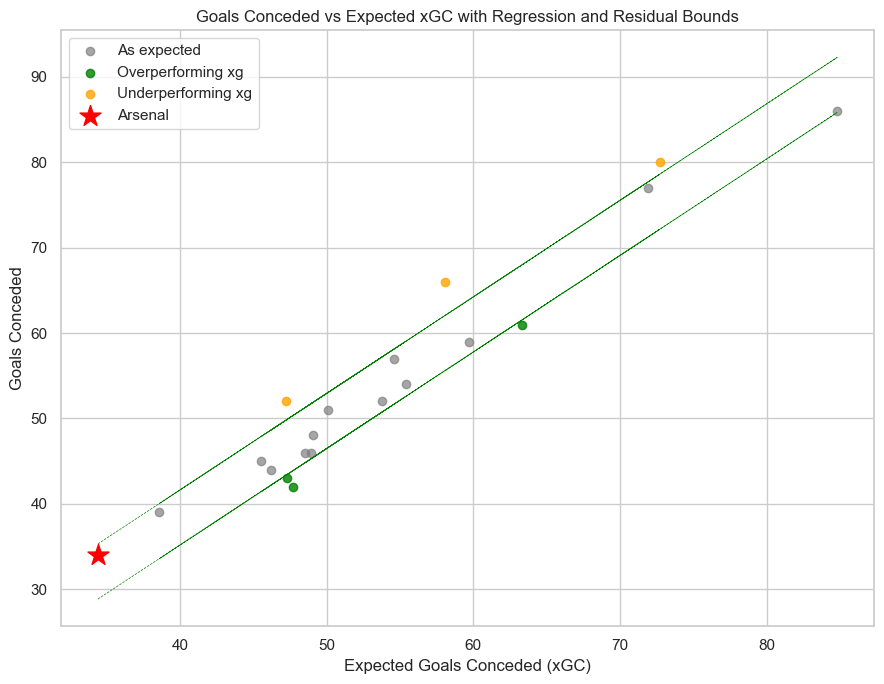

In [134]:
plot_conceded_vs_xg_with_bounds(team_data_all,team='Arsenal')

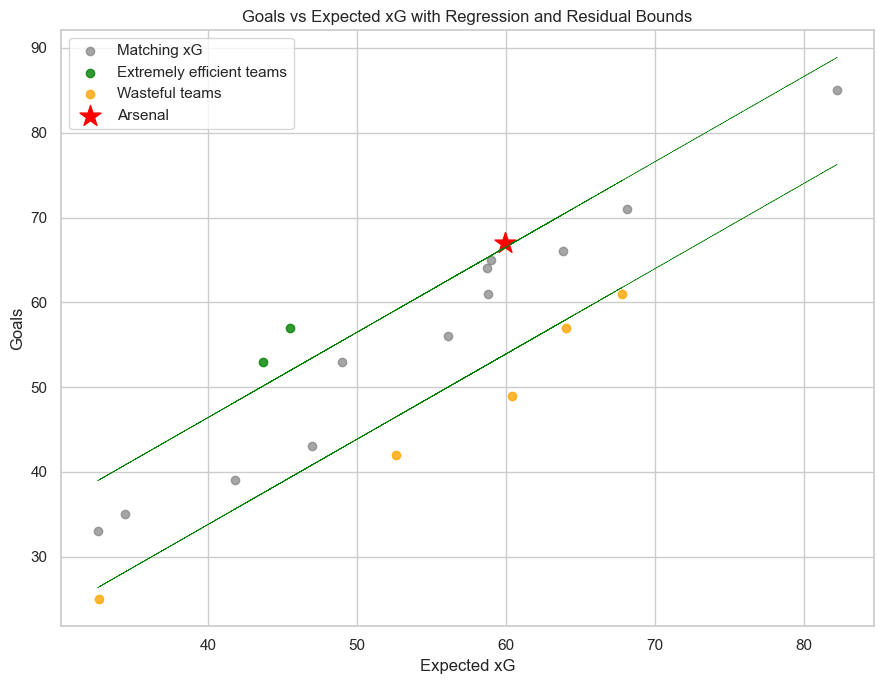

In [135]:
plot_performance_vs_xg_with_bounds(team_data_all,team='Arsenal')

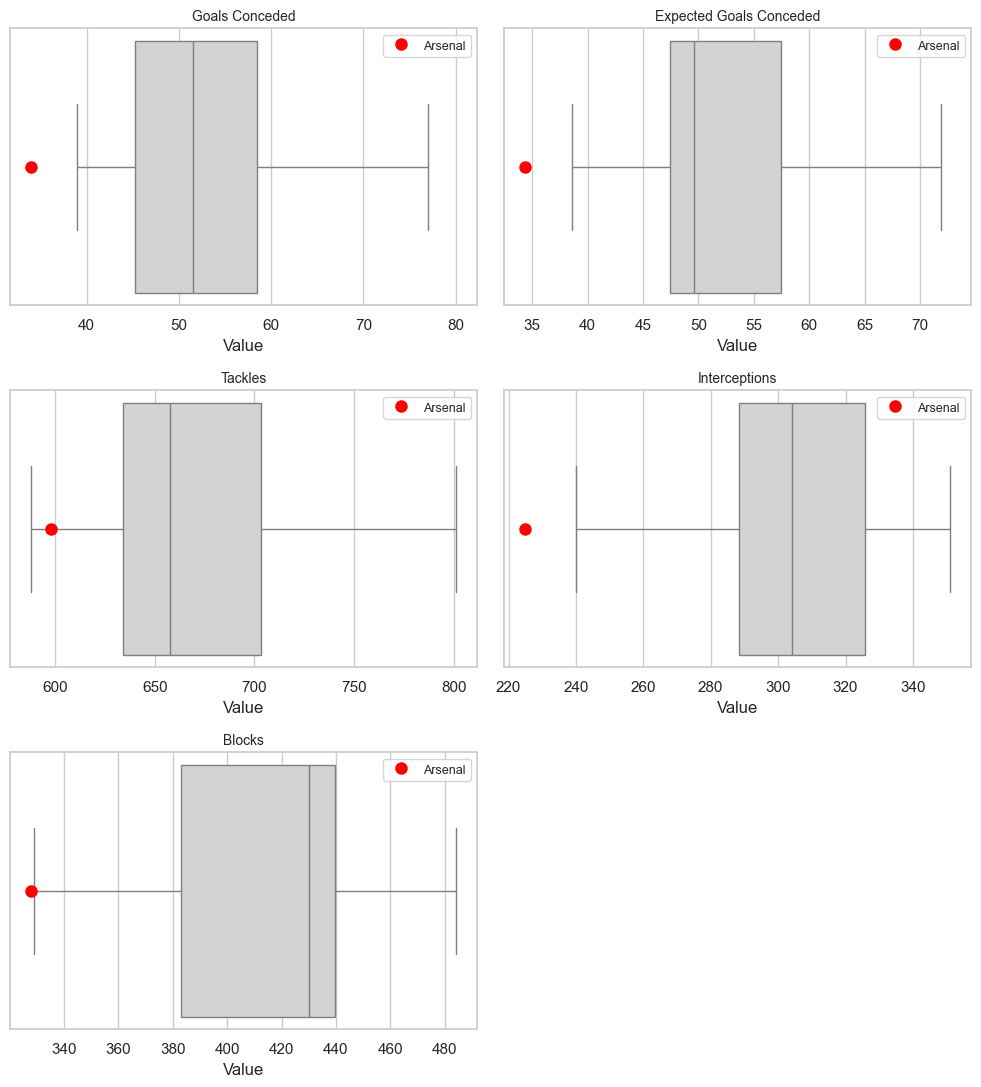

In [140]:
plot_attribute_boxplots(team_data_all,defensive_attributes_team,team='Arsenal')

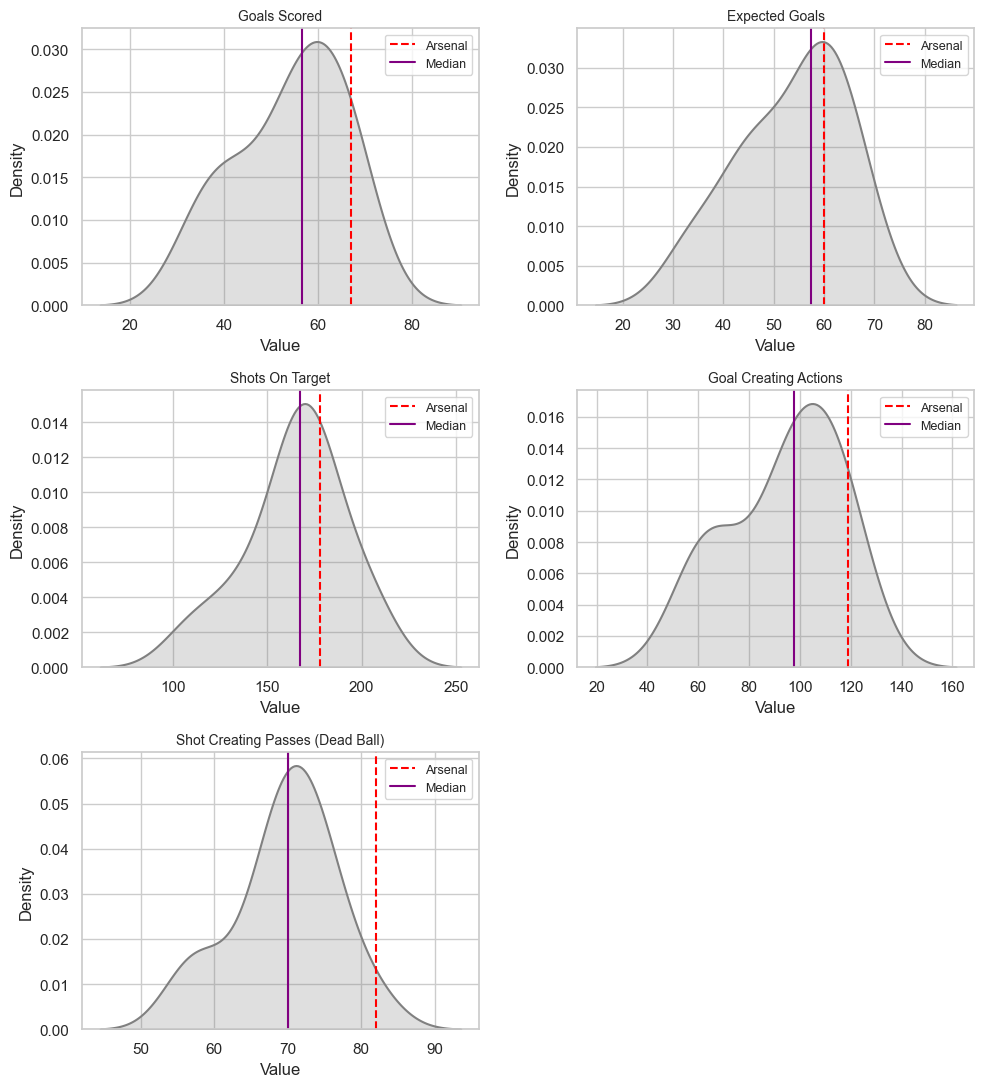

In [137]:
plot_attribute_distributions(team_data_all,attacking_attributes_team,team='Arsenal')

In [139]:
style_team_comparison(team_data_all,defensive_attributes_team)

,squad,Goals Conceded,Expected Goals Conceded,Tackles,Interceptions,Blocks
0,Arsenal,0.050000,0.050000,0.200000,0.050000,0.050000
1,Aston Villa,0.500000,0.550000,0.350000,0.150000,0.100000
2,Bournemouth,0.375000,0.400000,0.650000,0.950000,0.850000
3,Brentford,0.650000,0.700000,0.300000,0.300000,0.900000
4,Brighton,0.700000,0.650000,0.750000,0.600000,0.700000
5,Chelsea,0.200000,0.300000,0.100000,0.250000,0.200000
6,Crystal Palace,0.450000,0.500000,0.900000,0.850000,0.950000
7,Everton,0.250000,0.200000,0.850000,0.900000,0.400000
8,Fulham,0.575000,0.250000,0.600000,0.450000,0.300000
9,Ipswich Town,0.950000,0.950000,0.150000,0.500000,0.600000
